In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('fivethirtyeight')

### 0. 주어진 데이터를 불어온 후 상위 10개 행을 출력해 주세요.

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


### 1. 각 Column별로 null값이 있는지 확인해주세요.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

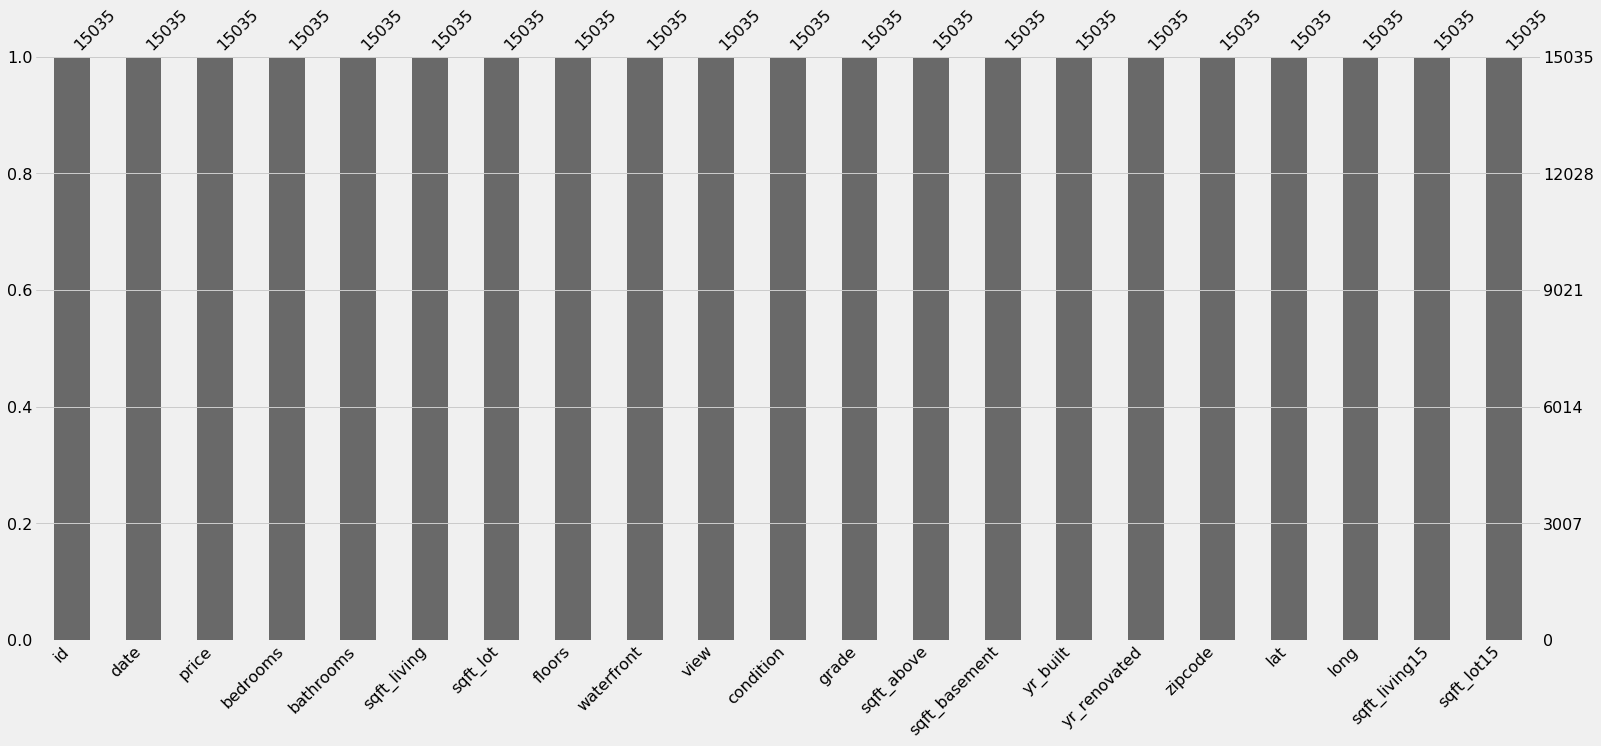

In [6]:
import missingno as msno
msno.bar(data)

### 2. grade Column에는 어떤 값이 있는지 확인해주세요.

In [7]:
data['grade'].unique()

array([ 7,  6,  8,  9, 10, 11, 12,  5,  4,  3, 13,  1], dtype=int64)

### 3. zipcode에 대해서 문자열로 바꿔주세요.

In [8]:
data['zipcode'] = data['zipcode'].astype(str)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  object 
 17  lat            15035 non-null  float64
 18  long  

### 4. loc를 활용하여 date, price, grade만 출력해주세요.

In [10]:
data.loc[:,['date','price','grade']]

,date,price,grade
0,20141013T000000,221900.0,7
1,20150225T000000,180000.0,6
2,20150218T000000,510000.0,8
3,20140627T000000,257500.0,7
4,20150115T000000,291850.0,7
...,...,...,...
15030,20141014T000000,610685.0,9
15031,20150326T000000,1007500.0,9
15032,20140521T000000,360000.0,8
15033,20150223T000000,400000.0,8


### 5. grade가 13인 행들만 보여주세요.

In [11]:
data[data['grade'] == 13]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3134,3134,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
3867,3867,20141010T000000,1780000.0,4,3.25,4890,13402,2.0,0,0,...,13,4890,0,2004,0,98059,47.5303,-122.131,5790,13539
4266,4266,20141120T000000,2385000.0,4,4.00,6330,13296,2.0,0,2,...,13,4900,1430,2000,0,98033,47.6488,-122.201,2200,9196
4957,4957,20140701T000000,3800000.0,5,5.50,7050,42840,1.0,0,2,...,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
5560,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,...,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
7246,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
10152,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021


### 6. grade별로 평균 가격을 보여주세요.

In [12]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
group_data = data.groupby('grade')['price'].agg([('grade_mean','mean')]);group_data

,grade_mean
grade,
1,1.420000e+05
3,2.710000e+05
4,2.097413e+05
5,2.510696e+05
6,3.001554e+05
7,4.015281e+05
8,5.423156e+05
9,7.734781e+05
10,1.062482e+06


### 7. 6번에서 만든 데이터를 원본 데이터와 merge해주세요.

In [14]:
pd.merge(data,group_data,on='grade',how='inner').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_mean
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,401528.057643
1,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,401528.057643
2,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,401528.057643
3,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,401528.057643
4,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,401528.057643


### 8. Date Column을 이용해 년, 월, 일에 해당하는 3개의 새로운 Column을 만들어주세요.

In [15]:
import datetime
tmp = data['date'].apply(lambda x: datetime.datetime.strptime(x.split('T')[0],'%Y%m%d'))

In [16]:
data['year'] = tmp.apply(lambda x: x.year)
data['month'] = tmp.apply(lambda x: x.month)
data['day'] = tmp.apply(lambda x: x.day)

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


### 9. 이후 Price를 예측하는 모델을 제작하기 위해 추가적인 변수를 만드려고 합니다. Price의 데이터 분포를 확인하고 1개 이상의 EDA를 통해 의견을 제시해주세요.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

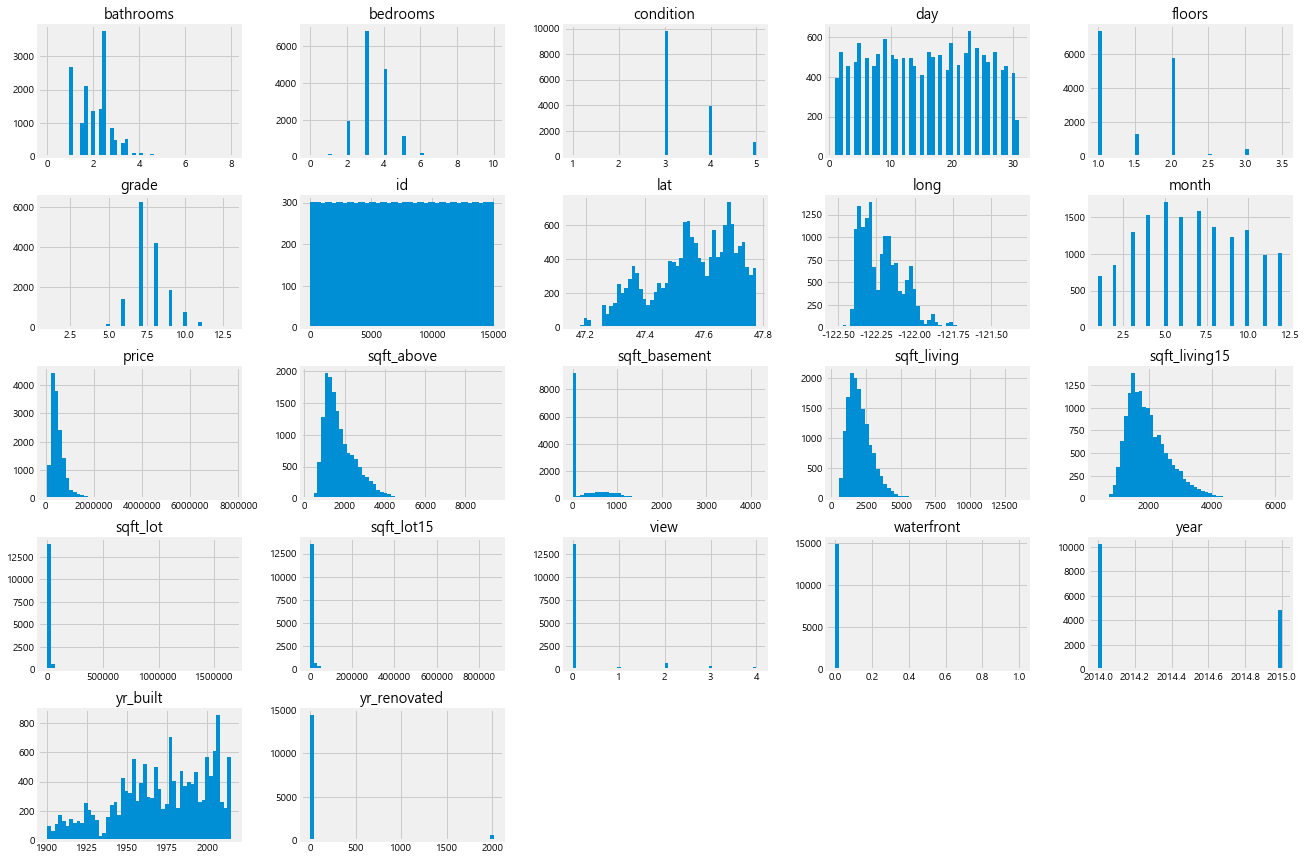

In [19]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  object 
 17  lat            15035 non-null  float64
 18  long  

In [21]:
data['total_rooms'] = data['bedrooms'] + data['bathrooms']

Text(0.5, 1.0, 'corr : 0.48')

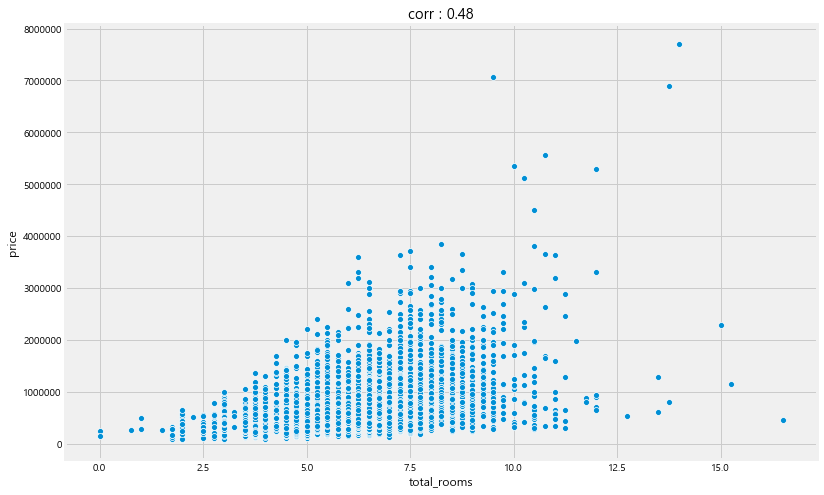

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(data['total_rooms'],data['price'])
plt.title('corr : %.2f'%(data[['total_rooms','price']].corr().iloc[0][1]))

총 방의 개수라는 변수를 추가했을 때 비교적 강한 선형 상관관계성을 띈다

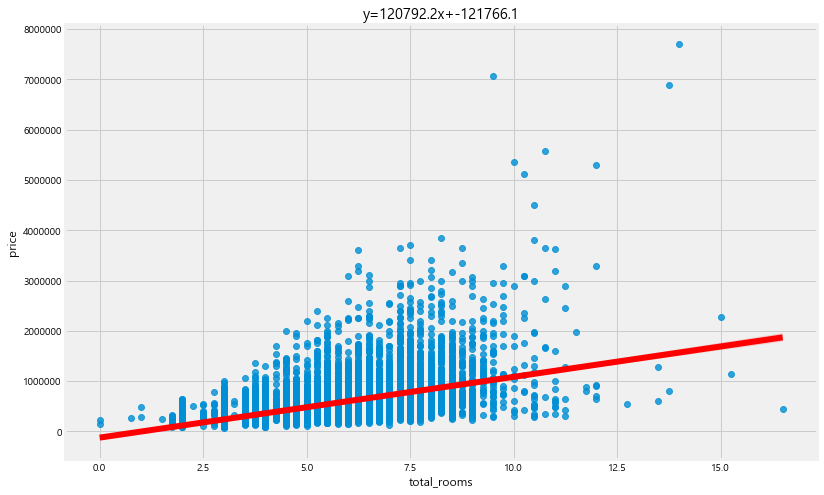

In [25]:
from scipy import stats
plt.figure(figsize=(12,8))
slope, intercept, r_value, p_value, std_err = stats.linregress(data['total_rooms'],data['price'])
sns.regplot(data['total_rooms'],data['price'],line_kws={'color':'red'})
plt.title("y={0:.1f}x+{1:.1f}".format(slope,intercept))
plt.show()